In [1]:
class Point(object):

    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z

class OctBox(object):
    import numpy as np
    def __init__(self,x,y,z,w,l,h):
        # x,y,z defines centroid
        # Width in x
        # Length in y
        # Height in z
        self.x = x
        self.y = y
        self.z = z
        self.w = w
        self.l = l
        self.h = h

    def contains(self, point):
        point_contained = ( point.x >= self.x - self.w/2 and \
                            point.x <= self.x + self.w/2 and \
                            point.y >= self.y - self.l/2 and \
                            point.y <= self.y + self.l/2 and \
                            point.z >= self.z - self.h/2 and \
                            point.z <= self.z + self.h/2)
        return point_contained

class OctTree(object):
    # import numpy as np
    # import matplotlib.pyplot as plt
    # import matpl

    def __init__(self, boundary, capacity):
        self.boundary = boundary
        self.capacity = capacity
        self.points = []
        self.divide = False

    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        z = self.boundary.z
        w = self.boundary.w/2
        l = self.boundary.l/2
        h = self.boundary.h/2

        # upper
        unw = OctBox( x - w/2, y + w/2, z + h/2, w, l, h)
        une = OctBox( x + w/2, y + w/2, z + h/2, w, l, h)
        usw = OctBox( x - w/2, y - w/2, z + h/2, w, l, h)
        use = OctBox( x + w/2, y - w/2, z + h/2, w, l, h)
        # lower
        lnw = OctBox( x - w/2, y + w/2, z - h/2, w, l, h)
        lne = OctBox( x + w/2, y + w/2, z - h/2, w, l, h)
        lsw = OctBox( x - w/2, y - w/2, z - h/2, w, l, h)
        lse = OctBox( x + w/2, y - w/2, z - h/2, w, l, h)

        # upper
        self.unw = OctTree(unw, self.capacity)
        self.une = OctTree(une, self.capacity)
        self.usw = OctTree(usw, self.capacity)
        self.use = OctTree(use, self.capacity)
        # lower
        self.lnw = OctTree(lnw, self.capacity)
        self.lne = OctTree(lne, self.capacity)
        self.lsw = OctTree(lsw, self.capacity)
        self.lse = OctTree(lse, self.capacity)

        self.divide = True

        for pt in self.points:
            self.une.insertpoint(pt)
            self.unw.insertpoint(pt)
            self.use.insertpoint(pt)
            self.usw.insertpoint(pt)
            self.lne.insertpoint(pt)
            self.lnw.insertpoint(pt)
            self.lse.insertpoint(pt)
            self.lsw.insertpoint(pt)

    def insertpoint(self, point):
        if (not self.boundary.contains(point)):
            return False
        if (len(self.points) < self.capacity):
            self.points.append(point)
            return True
        else:
            if ( not self.divide ):
                self.subdivide()
        if ( self.une.insertpoint(point) ):
            return True
        if ( self.unw.insertpoint(point) ):
            return True
        if ( self.use.insertpoint(point) ):
            return True
        if ( self.usw.insertpoint(point) ):
            return True
        if ( self.lne.insertpoint(point) ):
            return True
        if ( self.lnw.insertpoint(point) ):
            return True
        if ( self.lse.insertpoint(point) ):
            return True
        if ( self.lsw.insertpoint(point) ):
            return True

    def show(self,plt):
        if (self.divide):
            self.une.show(plt)
            self.unw.show(plt)
            self.use.show(plt)
            self.usw.show(plt)
            self.lne.show(plt)
            self.lnw.show(plt)
            self.lse.show(plt)
            self.lsw.show(plt)
        x = self.boundary.x
        y = self.boundary.y
        z = self.boundary.z
        w = self.boundary.w/2
        l = self.boundary.l/2
        h = self.boundary.h/2
        edges = [[[x-w,x+w],[y-l,y-l],[z-h,z-h]],
                 [[x+w,x+w],[y-l,y+l],[z-h,z-h]],
                 [[x+w,x-w],[y+l,y+l],[z-h,z-h]],
                 [[x-w,x-w],[y+l,y-l],[z-h,z-h]],
                 [[x-w,x-w],[y-l,y-l],[z-h,z+h]],
                 [[x+w,x+w],[y-l,y-l],[z-h,z+h]],
                 [[x+w,x+w],[y+l,y+l],[z-h,z+h]],
                 [[x-w,x-w],[y+l,y+l],[z-h,z+h]],
                 [[x-w,x+w],[y-l,y-l],[z+h,z+h]],
                 [[x+w,x+w],[y-l,y+l],[z+h,z+h]],
                 [[x+w,x-w],[y+l,y+l],[z+h,z+h]],
                 [[x-w,x-w],[y+l,y-l],[z+h,z+h]]]
        for i in range(12):
            plt.plot(edges[i][0][:],edges[i][1][:],edges[i][2][:],'k')

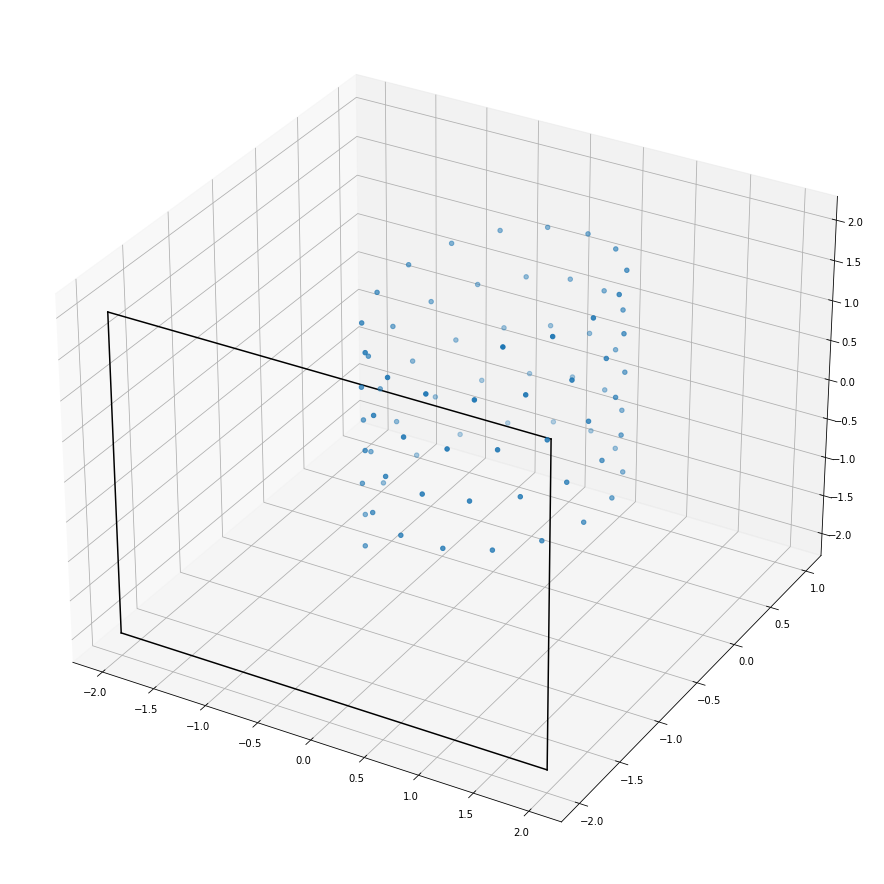

In [4]:
from octree_module import Point, OctBox, OctTree
import numpy as np
# %matplotlib qt
import matplotlib.pyplot as plt

boundary = OctBox(0., 0., 0., 4, 4, 4)
qt = OctTree(boundary,4)

# Plot figure
fig = plt.figure(figsize=(16,16))
# e1 = [qt.boundary.x - qt.boundary.w, qt.boundary.
ax = plt.axes(projection='3d')

npts = 80
# xpts = np.random.rand(npts)
# ypts = np.random.rand(npts)
# zpts = np.random.rand(npts)
zpts = np.linspace(-1.5, 1.5, npts)
xpts = np.sin(10*zpts)
ypts = np.cos(10*zpts)

# create simple line plot
for i in range(npts):
    x = xpts[i]
    y = ypts[i]
    z = zpts[i]
    pnt = Point(x,y,z)
    qt.insertpoint(pnt)

ax.scatter3D(xpts,ypts,zpts)
qt.show(plt)
plt.show()
